# plot on structure

In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
import sys
sys.path.append('../../')

import sys, importlib
module_name = "Functions"
if module_name in sys.modules:
    del sys.modules[module_name]
Functions = importlib.import_module(module_name)

from Functions_HuggingFace import *


import re
import py3Dmol
from Bio import PDB, Align
from Bio.SeqUtils import seq1



In [2]:
# mutations = K_indexed_muts # e.g. ['A145K', 'G158E']
# pdb_path = "4FNK.pdb" # Ensure this file is in your directory
pdb_path="/home3/oml4h/PLM_SARS-CoV-2/Sequences/4WE4_assembly.pdb"
# view = visualize_mutations_on_pdb(pdb_path, user_k_seq, mutations)
# view.show()
sequences = read_sequences_to_dict('/home3/oml4h/PLM_SARS-CoV-2/Sequences/huH3N2_HA_CDS.translated.fas')
ids=list(sequences.keys())
lineage=[str(x).split("|")[-1] for x in ids]
print(lineage)
print(ids[2:(len(ids)-1)])
K_indexed_muts = [m for m in get_mutations(sequences[ids[4]],sequences[ids[len(ids)-1]]) if "del" not in m and '-' not in m  ] 

print(K_indexed_muts)

view = visualise_mutations_on_pdb(pdb_path, sequences[ids[len(ids)-1]], K_indexed_muts)
view.show()

['J', 'J', 'J.2', 'J.2', 'J.2.4', 'J.2.4.1']
['EPI2981619|HA|A/Croatia/10136RV/2023|EPI_ISL_18856647|J.2', 'EPI2990337|HA|A/District_Of_Columbia/27/2023|EPI_ISL_18862356|J.2', 'EPI4551140|HA|A/England/415/2024|EPI_ISL_20080368|J.2.4']
['K18N', 'S160N', 'N174D', 'I176K', 'Q189R', 'T344A', 'S394N']
Processing PDB: /home3/oml4h/PLM_SARS-CoV-2/Sequences/4WE4_assembly.pdb
  -> Detected Multimer PDB (will use file content)
  -> Match found on Chain A (Score: 255.0)
  -> Match found on Chain B (Score: 159.0)
  -> Match found on Chain A (Score: 255.0)
  -> Match found on Chain B (Score: 159.0)
  -> Match found on Chain A (Score: 255.0)
  -> Match found on Chain B (Score: 159.0)
  -> Detected 3 models. Adding all models to viewer.
Mapped 5 mutation sites across the structure.
Matched chains: ['A', 'B']
Processing PDB: /home3/oml4h/PLM_SARS-CoV-2/Sequences/4WE4_assembly.pdb
  -> Detected Multimer PDB (will use file content)
  -> Match found on Chain A (Score: 255.0)
  -> Match found on Chain B (

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Entropy shape: (567,)
Probability shape: (567,)


Text(0.5, 1.0, 'Entropy vs Probability')

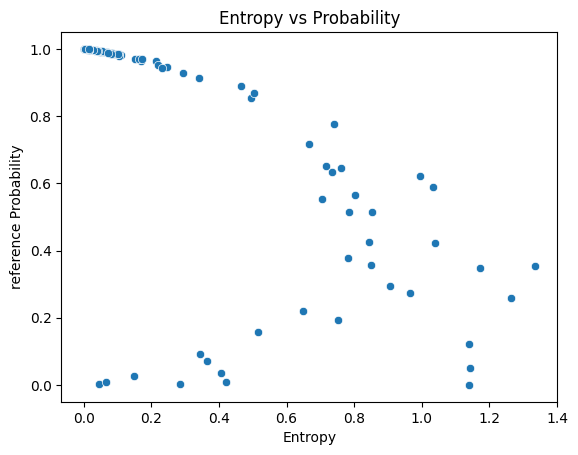

In [3]:
# import entropy and reference
probability=pd.read_csv("/home3/oml4h/PLM_SARS-CoV-2/Results/test/ESM2-HA80_probability.csv")
entropy=pd.read_csv("/home3/oml4h/PLM_SARS-CoV-2/Results/test/ESM2-HA80_entropy.csv")

# Take the final row and extract columns from position 2 onwards as numpy arrays
entropy_vals = entropy.iloc[-1, 2:].values
probability_vals = probability.iloc[-1, 2:].values

print(f"Entropy shape: {entropy_vals.shape}")
print(f"Probability shape: {probability_vals.shape}")

sns.scatterplot(x=entropy_vals, y=probability_vals)
plt.xlabel("Entropy")
plt.ylabel("reference Probability")
plt.title("Entropy vs Probability")


In [4]:
# Create background_values as a dict with 1-based positions
probability_dict = {i+1: val for i, val in enumerate(probability.iloc[-1, 2:].values)}

view = visualise_mutations_on_pdb(
    pdb_path, 
    sequences[ids[len(ids)-1]], 
    K_indexed_muts,
    background_values=probability_dict,
    title="Reference Probability"
)
view.show()


Processing PDB: /home3/oml4h/PLM_SARS-CoV-2/Sequences/4WE4_assembly.pdb
  -> Detected Multimer PDB (will use file content)
  -> Match found on Chain A (Score: 255.0)
  -> Match found on Chain B (Score: 159.0)
  -> Match found on Chain A (Score: 255.0)
  -> Match found on Chain B (Score: 159.0)
  -> Match found on Chain A (Score: 255.0)
  -> Match found on Chain B (Score: 159.0)
  -> Detected 3 models. Adding all models to viewer.
Mapped 5 mutation sites across the structure.
Matched chains: ['A', 'B']
Mapped 5 mutation sites across the structure.
Matched chains: ['A', 'B']


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [5]:
# Create background_values as a dict with 1-based positions
entropy_dict = {i+1: val for i, val in enumerate(entropy.iloc[-1, 2:].values)}

view = visualise_mutations_on_pdb(
    pdb_path, 
    sequences[ids[len(ids)-1]], 
    K_indexed_muts,
    background_values=entropy_dict,
    title="Reference entropy"
)
view.show()


Processing PDB: /home3/oml4h/PLM_SARS-CoV-2/Sequences/4WE4_assembly.pdb
  -> Detected Multimer PDB (will use file content)
  -> Match found on Chain A (Score: 255.0)
  -> Match found on Chain B (Score: 159.0)
  -> Match found on Chain A (Score: 255.0)
  -> Match found on Chain B (Score: 159.0)
  -> Match found on Chain A (Score: 255.0)
  -> Match found on Chain B (Score: 159.0)
  -> Detected 3 models. Adding all models to viewer.
Mapped 5 mutation sites across the structure.
Matched chains: ['A', 'B']
Mapped 5 mutation sites across the structure.
Matched chains: ['A', 'B']


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [6]:
from Bio import SeqIO

query_path = "/home3/oml4h/PLM_SARS-CoV-2/Sequences/huH3N2_HA_CDS.translated.fas"
reference_path = "/home3/oml4h/PLM_SARS-CoV-2/Sequences/H3N2_canonical.fa"

# 1. Read the reference sequence (Assuming single sequence in file)
# We use 'next' to get the first item from the iterator
ref_record = next(SeqIO.parse(reference_path, "fasta"))
ref_seq_str = str(ref_record.seq)

# 2. Read the query sequences
# We parse the file and pick the first one as a test case
query_iterator = SeqIO.parse(query_path, "fasta")
first_query_record = next(query_iterator)

# 3. Run the mapping function
# Note: We pass the whole record for the query, and the string for the reference
h3_map = create_h3_numbering_map(first_query_record, ref_seq_str)

# 4. Verify Output
print(f"Generated H3 map for: {first_query_record.id}")
print(f"Total mapped positions: {len(h3_map)}")
print("Sample (first 5 positions):", list(h3_map.items())[:5])

Generated H3 map for: EPI2178977|HA|A/Thailand/8/2022|EPI_ISL_14991375|J
Total mapped positions: 567
Sample (first 5 positions): [(0, 'SP-15'), (1, 'SP-14'), (2, 'SP-13'), (3, 'SP-12'), (4, 'SP-11')]


In [11]:
# Example: Convert mutations to canonical H3 numbering
# First, create h3_map with HA2_start parameter (HA2 typically starts around position 329)
h3_map_with_ha2 = create_h3_numbering_map(first_query_record, ref_seq_str, HA2_start=330)

# Convert your mutations to canonical numbering
canonical_mutations = mutations_to_canonical(K_indexed_muts, h3_map_with_ha2)

print("Original mutations (sequence numbering):")
print(K_indexed_muts[:10])  # Show first 10
print("\nCanonical mutations (H3 numbering):")
print(canonical_mutations[:10])  # Show first 10


Original mutations (sequence numbering):
['K18N', 'S160N', 'N174D', 'I176K', 'Q189R', 'T344A', 'S394N']

Canonical mutations (H3 numbering):
['K2N', 'S144N', 'N158D', 'I160K', 'Q173R', 'T328A', 'HA2:S49N']


In [8]:

view = visualise_mutations_on_pdb(
    pdb_path, 
    sequences[ids[len(ids)-1]], 
    K_indexed_muts,
    background_values=entropy_dict,
    title="Reference entropy",
    canonical_map=h3_map  # Now displays H3 canonical numbering in separate legend
)
view.show()

Processing PDB: /home3/oml4h/PLM_SARS-CoV-2/Sequences/4WE4_assembly.pdb
  -> Detected Multimer PDB (will use file content)
  -> Match found on Chain A (Score: 255.0)
  -> Match found on Chain B (Score: 159.0)
  -> Match found on Chain A (Score: 255.0)
  -> Match found on Chain B (Score: 159.0)
  -> Match found on Chain A (Score: 255.0)
  -> Match found on Chain B (Score: 159.0)
  -> Detected 3 models. Adding all models to viewer.
Mapped 5 mutation sites across the structure.
Matched chains: ['A', 'B']
Mapped 5 mutation sites across the structure.
Matched chains: ['A', 'B']


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [9]:
# 1. Setup Input Data
# The parent header provided
parent_header = "EPI4551140|HA|A/England/415/2024|EPI_ISL_20080368|J.2.4"

# PLACEHOLDER: Replace this string with your actual amino acid sequence for EPI4551140
# I have made this long enough to cover the T328A mutation position
parent_sequence = read_sequences_to_dict('/home2/oml4h/PLM_SARS-CoV-2/Sequences/huH3N2_HA_CDS.translated.fas')
parent_sequence=parent_sequence[parent_header]
# 2. Define the mutation steps
# Each step is a list of mutations to apply cumulatively to the previous result

#
steps_canonical = [
    ['I160K'],              # Step 1
    ['N158D', 'T328A'],     # Step 2
    ['S144N']               # Step 3
]

steps = [
    ['I176K'],              # Step 1
    ['N174D', 'T344A'],     # Step 2
    ['S160N']               # Step 3
]


# 3. Iterative Generation
current_sequence = parent_sequence
current_suffix = "" # Used to build the cumulative name part

print(f"Original Header: >{parent_header}\n")

for step_i, step_mutations in enumerate(steps):
    # Apply new mutations to the sequence from the PREVIOUS step
    # This works because mutate_sequence returns a full string, which becomes the input for the next round
    current_sequence = mutate_sequence(current_sequence, step_mutations)
    
    # Build the name suffix (e.g., _I160K then _I160K_N158D_T328A)
    # We join mutations with underscore and add them to the running suffix
    step_suffix = "_" + "_".join(steps_canonical[step_i])
    current_suffix += step_suffix
    
    # Construct the new header
    # We take the parent header and simply append the cumulative suffix
    new_header = f"{parent_header}{current_suffix}"
    
    # Print in FASTA format
    print(f">{new_header}")
    print(current_sequence)
    print() # Newline for readability

Original Header: >EPI4551140|HA|A/England/415/2024|EPI_ISL_20080368|J.2.4

>EPI4551140|HA|A/England/415/2024|EPI_ISL_20080368|J.2.4_I160K
MKAIIALSNILCLVFAQKIPGNDNSTATLCLGHHAVPNGTIVKTITNDRIEVTNATELVQNSSIGKICNSPHQILDGGNCTLIDALLGDPQCDGFQNKEWDLFVERSRANSSCYPYDVPDYASLRSLVASSGTLEFKDESFNWTGVKQNGKSSACKRGSSSSFFSRLNWLTSLNNKYPAQNVTMPNKEQFDKLYIWGVHHPDTDRNQFSLFAQSSGRITVSTKRSQQAVIPNIGSRPRVRDIPSRISIYWTIVKPGDILLINSTGNLIAPRGYFKIRSGKSSIMRSDAPIGECKSECITPNGSIPNDKPFQNVNRITYGACPRYVKQSTLKLATGMRNVPEKQTRGIFGAIAGFIENGWEGMVDGWYGFRHQNSEGRGQAADLKSTQAAIDQISGKLNRLIGKTNEKFHQIEKEFSEVEGRVQDLEKYVEDTKIDLWSYNAELLVALENQHTIDLTDSEMNKLFEKTKKQLRENAEDMGNGCFKIYHKCDNACIGSIRNETYDHNVYRDEALNNRFQIKGVELKSGYKDWILWISFAMSCFLLCIALLGFIMWACQKGNIRCNICIX

>EPI4551140|HA|A/England/415/2024|EPI_ISL_20080368|J.2.4_I160K_N158D_T328A
MKAIIALSNILCLVFAQKIPGNDNSTATLCLGHHAVPNGTIVKTITNDRIEVTNATELVQNSSIGKICNSPHQILDGGNCTLIDALLGDPQCDGFQNKEWDLFVERSRANSSCYPYDVPDYASLRSLVASSGTLEFKDESFNWTGVKQNGKSSACKRGSSSSFFSRLNWLTSLDNKYPAQNVTMPNKEQFDKLYIWGVHHPDTDRNQFSLFAQSSGRI